# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [134]:
!pip install statsmodels
!pip install scikit-learn
!pip install plotly

DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/pybullet-3.2.5-py3.11-macosx-12-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/pybullet-3.2.5-py3.11-macosx-12-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/pybullet-3.2.5-py3.11-macosx-12-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [135]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from   sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [136]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

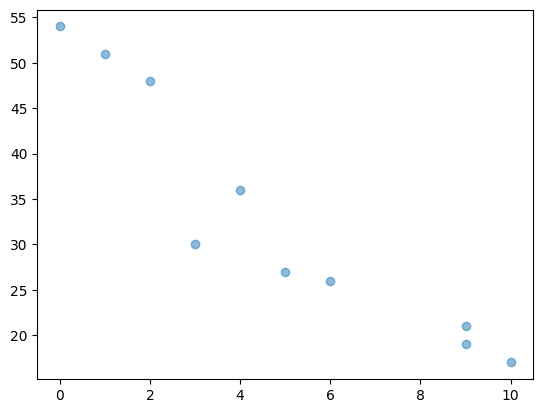

In [137]:
# Your code here
plt.plot(student_data.Tardies, student_data.Age, "o", alpha=0.5)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*  

It appears there's a tendency of tardiness to decrease with age.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [138]:
# your code here
covariance_sd = student_data.cov()
print(covariance_sd)

correlation_sd = student_data.corr()
print(correlation_sd)

                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444
              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [139]:
seed = 47

lm = LinearRegression()
x = student_data.Tardies.values.reshape(-1, 1)
y = student_data.Age.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = seed)

lm.fit(X_train, y_train)

print(lm.intercept_, lm.coef_)

[50.08689024] [[-3.47713415]]


Plot your regression model on your scatter plot.

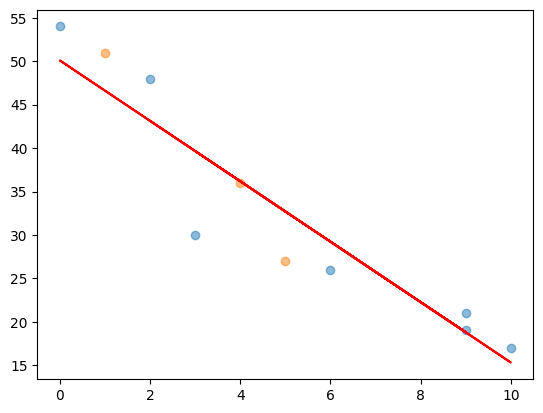

In [140]:
# Your code here.
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=0.5)
plt.plot(X_test, y_test, "o", alpha=0.5)
plt.plot(X_train, y_train_pred, "r")

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

:::
Based on the result of the Linear Regression, we can observe a correlation between the age of a student and their tardiness.
::

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [141]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [142]:
# Your code here.
# display(vehicles.info())
# display(vehicles.head())
# display(vehicles.columns)
# 'Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
# 'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
# 'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
# 'CO2 Emission Grams/Mile', 'Fuel Cost/Year'
features = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']     
df_vehicles = vehicles[features]
df_vehicles

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [143]:
corr_mat = df_vehicles.corr()['CO2 Emission Grams/Mile']
corr_mat

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

:::
Analysing the plots and the correlation matrix, Fuel Barrels/Year has a strong correlation to CO2 Emission  
Other strong candidates are the Fuel Cost/Year and Combined MPG (negative correlation)  
On the other hand, the Cylinders are fairly scattered and the Year doesn't bring any usefull information
:::

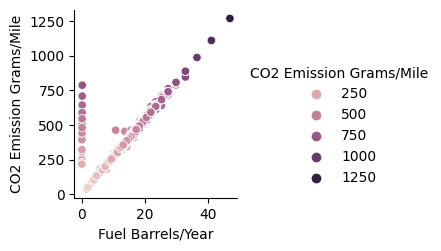

In [144]:
sns.pairplot(df_vehicles, x_vars=['Fuel Barrels/Year'], y_vars='CO2 Emission Grams/Mile', hue='CO2 Emission Grams/Mile')

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [161]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Your code here.
seed = 47
X = vehicles[["Fuel Cost/Year"]].values
# X = vehicles[["Fuel Cost/Year","Cylinders","Combined MPG"]].values # better alternative
Y = vehicles[["CO2 Emission Grams/Mile"]].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=seed)

# print(y_train)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 1875.2842229008952
R-squared: 0.866848272325532
Coefficients: [[0.21840975]]
Intercept: [61.76058764]


In [162]:
import statsmodels.api as sm
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          3.986e+06
Date:                Sun, 02 Jun 2024   Prob (F-statistic):                        0.00
Time:                        17:04:58   Log-Likelihood:                     -1.8891e+05
No. Observations:               35952   AIC:                                  3.778e+05
Df Residuals:                   35951   BIC:                                  3.778e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2490      0.000   1996.605      0.000       0.249       0.249
==============================================================================
Omnibus:                     4557.918   Durbin-Watson:                   0.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6274.940
Skew:                          -1.010   Prob(JB):                         0.00
Kurtosis:                       2.667   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

:::
As observed, the `Fuel Barrels/Year` is the most relevant feature. Still, just this alone doesn't guarantee a high confidence result (R2 is around 0.86)  
By adding `Cylinders` and `Combined MPG` to our included features, we can increase our R2 up to 0.92.
:::

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [147]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [148]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [149]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*